In [86]:
"""
Read in the metadata and merge with the novelty data
"""

data_dir = 'lit_data/precocity'
all_dfs = []

import pandas as pd
import os
import re
# Load metadata
df_meta = pd.read_csv('lit_data/lit_metadata/LitMetadataWithS2.tsv', sep='\t')

# Load all paper data files
print("Reading data files...")
for file in os.listdir(data_dir):
    if file.endswith('.tsv'):
        match = re.search(r'(\d{4})', os.path.basename(file))
        year = match.group(1) if match else 'unknown'
        # print(f"Processing {csv} (year: {year})")
        path = os.path.join(data_dir, file)
        df = pd.read_csv(path, sep='\t')
        df['paperId'] = df['docid']
        df['decade'] = year
        merged = df_meta.merge(df, on='paperId', how='left')
        all_dfs.append(merged)


gender_meta = pd.read_csv('lit_data/author_genders_lit.csv')
#read in the gender data we have already


Reading data files...


In [87]:
df_all = pd.concat(all_dfs, ignore_index=True)


In [88]:
"deduplicate the data by selecting one set of parameters ted recommended"

#filter for only male/female gender and also for the single set of novelty results (time chunks etc)

#chunks_used
    #use 0.25 (top 25% most novel chunks)
df_all = df_all.loc[df_all['chunks_used'] == 0.25]

#time_radius
    #use 20
df_all = df_all.loc[df_all['time_radius'] == 20]


#filtered
    #use trainauthquote
df_all = df_all.loc[df_all['filtered'] == 'trainauthquote']



#fraction_compared
    #10 percent most similar vs all articles... use all articles aka 1.0

df_all = df_all.loc[df_all['fraction_compared'] == 1.0]


#num_chunks
    #I don't think this one needed to be filtered?

In [89]:
gender_meta = gender_meta[gender_meta['gender'].isin(['male', 'female'])]


In [90]:
#apply gender dict
gender_dict = pd.Series(gender_meta['gender'].values, index=gender_meta['author']).to_dict()
df_all['gender'] = df_all['authors'].map(gender_dict).fillna('unknown')

In [91]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,num_chunks,fraction_compared,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,7.0,1.0,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,unknown
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,2.0,1.0,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,unknown
174,10.2307/3721313,The Modern Language Review,1963,['Margaret McHaffie'],Review Article,['eng'],600,article | book-review,0,Jeremias Gotthelf : eine Einführung in seine W...,...,1.0,1.0,trainauthquote,20.0,0.25,0.235353,6.185017,5.949665,1960,unknown
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,7.0,1.0,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,unknown
404,10.2307/512220,The Review of English Studies,1967,['William H. Matchett'],Donne's 'Peece of Chronicle',['eng'],920,article | research-article,0,DONNE'S ’PEECE OF CHRONICLE‘,...,1.0,1.0,trainauthquote,20.0,0.25,0.280793,5.364418,5.083625,1960,unknown


In [92]:
def split_list(s):
    return s.split(';')


df_all['authors'] = df_all['authors'].map(split_list)



In [93]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,num_chunks,fraction_compared,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender
17,10.2307/461288,PMLA,1967,[['Jean-Jacques Demorest']],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,7.0,1.0,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,unknown
68,10.2307/3723455,The Modern Language Review,1969,[['Patricia Thomson']],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,2.0,1.0,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,unknown
174,10.2307/3721313,The Modern Language Review,1963,[['Margaret McHaffie']],Review Article,['eng'],600,article | book-review,0,Jeremias Gotthelf : eine Einführung in seine W...,...,1.0,1.0,trainauthquote,20.0,0.25,0.235353,6.185017,5.949665,1960,unknown
339,10.2307/460722,PMLA,1963,[['Lillian Herlands Hornstein']],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,7.0,1.0,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,unknown
404,10.2307/512220,The Review of English Studies,1967,[['William H. Matchett']],Donne's 'Peece of Chronicle',['eng'],920,article | research-article,0,DONNE'S ’PEECE OF CHRONICLE‘,...,1.0,1.0,trainauthquote,20.0,0.25,0.280793,5.364418,5.083625,1960,unknown


In [94]:
# df_all['creator_list'].explode()
# df_all['creator'] = df_all['creator'].explode()

df_all = df_all.explode('authors')


In [95]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,num_chunks,fraction_compared,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,7.0,1.0,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,unknown
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,2.0,1.0,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,unknown
174,10.2307/3721313,The Modern Language Review,1963,['Margaret McHaffie'],Review Article,['eng'],600,article | book-review,0,Jeremias Gotthelf : eine Einführung in seine W...,...,1.0,1.0,trainauthquote,20.0,0.25,0.235353,6.185017,5.949665,1960,unknown
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,7.0,1.0,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,unknown
404,10.2307/512220,The Review of English Studies,1967,['William H. Matchett'],Donne's 'Peece of Chronicle',['eng'],920,article | research-article,0,DONNE'S ’PEECE OF CHRONICLE‘,...,1.0,1.0,trainauthquote,20.0,0.25,0.280793,5.364418,5.083625,1960,unknown


In [96]:
df_all['author_clean'] = df_all['authors'].str.replace(r'<prefix>.*?</prefix>', '', regex=True).str.strip()

In [97]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,fraction_compared,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender,author_clean
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,1.0,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,unknown,['Jean-Jacques Demorest']
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,1.0,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,unknown,['Patricia Thomson']
174,10.2307/3721313,The Modern Language Review,1963,['Margaret McHaffie'],Review Article,['eng'],600,article | book-review,0,Jeremias Gotthelf : eine Einführung in seine W...,...,1.0,trainauthquote,20.0,0.25,0.235353,6.185017,5.949665,1960,unknown,['Margaret McHaffie']
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,1.0,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,unknown,['Lillian Herlands Hornstein']
404,10.2307/512220,The Review of English Studies,1967,['William H. Matchett'],Donne's 'Peece of Chronicle',['eng'],920,article | research-article,0,DONNE'S ’PEECE OF CHRONICLE‘,...,1.0,trainauthquote,20.0,0.25,0.280793,5.364418,5.083625,1960,unknown,['William H. Matchett']


In [98]:
df_all['author_clean'] = df_all['author_clean'].str.replace('[', '')
df_all['author_clean'] = df_all['author_clean'].str.replace(']', '')


In [99]:
df_all['first_name'] = df_all['author_clean'].str.split().str[0]


In [100]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,unknown,'Jean-Jacques Demorest','Jean-Jacques
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,unknown,'Patricia Thomson','Patricia
174,10.2307/3721313,The Modern Language Review,1963,['Margaret McHaffie'],Review Article,['eng'],600,article | book-review,0,Jeremias Gotthelf : eine Einführung in seine W...,...,trainauthquote,20.0,0.25,0.235353,6.185017,5.949665,1960,unknown,'Margaret McHaffie','Margaret
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,unknown,'Lillian Herlands Hornstein','Lillian
404,10.2307/512220,The Review of English Studies,1967,['William H. Matchett'],Donne's 'Peece of Chronicle',['eng'],920,article | research-article,0,DONNE'S ’PEECE OF CHRONICLE‘,...,trainauthquote,20.0,0.25,0.280793,5.364418,5.083625,1960,unknown,'William H. Matchett','William


In [101]:
df_all['author_clean'] = df_all['author_clean'].str.replace("'","")


In [102]:
#apply gender dict
gender_dict = pd.Series(gender_meta['gender'].values, index=gender_meta['author']).to_dict()
df_all['gender'] = df_all['author_clean'].map(gender_dict).fillna('unknown')

In [103]:
gender_dict

{'Patrick Brady': 'male',
 'Michel Grimaud': 'male',
 'Michael Hardt': 'male',
 'Philip Martin': 'male',
 'Thomas Hinton': 'male',
 'Daniel Fried': 'male',
 'Cyndia Susan Clegg': 'female',
 'Jennifer Wallace': 'female',
 'Martin W. Lewis': 'male',
 'Claire Shaw': 'female',
 'Miguel Fernández Labayen': 'male',
 'John Nash': 'male',
 'John Roe': 'male',
 'John J. Murray': 'male',
 'Chris Baldick': 'male',
 'Fred Norris Robinson': 'male',
 'David Scott Kastan': 'male',
 'Michel Fabre': 'male',
 'Max Bach': 'male',
 'James L. Allen': 'male',
 'Todd Butler': 'male',
 'Steve Hindle': 'male',
 'Michael Ferber': 'male',
 'Nathaniel Mackey': 'male',
 'Louis Lo': 'male',
 'Vicki Mahaffey': 'female',
 'Claire Jowitt': 'female',
 'Mary Erler': 'female',
 'Larry Wolff': 'male',
 'Owen Dudley Edwards': 'male',
 'Christine Dymkowski': 'female',
 'John C. Weston': 'male',
 'Ronald Taylor': 'male',
 'Isaiah Berlin': 'male',
 'Robert L. King': 'male',
 'Keith Hughes': 'male',
 'Siobhán Donovan': 'female

In [104]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,male,Jean-Jacques Demorest,'Jean-Jacques
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,female,Patricia Thomson,'Patricia
174,10.2307/3721313,The Modern Language Review,1963,['Margaret McHaffie'],Review Article,['eng'],600,article | book-review,0,Jeremias Gotthelf : eine Einführung in seine W...,...,trainauthquote,20.0,0.25,0.235353,6.185017,5.949665,1960,unknown,Margaret McHaffie,'Margaret
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,female,Lillian Herlands Hornstein,'Lillian
404,10.2307/512220,The Review of English Studies,1967,['William H. Matchett'],Donne's 'Peece of Chronicle',['eng'],920,article | research-article,0,DONNE'S ’PEECE OF CHRONICLE‘,...,trainauthquote,20.0,0.25,0.280793,5.364418,5.083625,1960,unknown,William H. Matchett,'William


In [105]:
df_all.loc[df_all['gender'] != 'unknown']

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,trainauthquote,20.0,0.25,-0.013390,8.627299,8.640689,1960,male,Jean-Jacques Demorest,'Jean-Jacques
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,trainauthquote,20.0,0.25,0.284837,5.996719,5.711883,1960,female,Patricia Thomson,'Patricia
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,trainauthquote,20.0,0.25,0.112459,6.578631,6.466172,1960,female,Lillian Herlands Hornstein,'Lillian
465,10.2307/435366,Modern Philology,1960,['David Novarr'],Dekker's Gentle Craft and the Lord Mayor of Lo...,['eng'],4590,article | research-article,0,Dekker's Gentle Craft and the Lord Mayor of Lo...,...,trainauthquote,20.0,0.25,0.153016,5.912094,5.759078,1960,male,David Novarr,'David
552,10.2307/434631,Modern Philology,1960,['David C. Fowler'],John Trevisa and the English Bible,['eng'],13131,article | research-article,0,John Trevisa and the English Bible,...,trainauthquote,20.0,0.25,0.174708,5.578721,5.404013,1960,male,David C. Fowler,'David
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905428,10.2307/2873048,ELH,1987,['Richard Wilson'],"""Is this a Holiday?"": Shakespeare's Roman Carn...",['eng'],5847,article | research-article,0,‘Is this a holiday?’: Shakespeare’s Roman Carn...,...,trainauthquote,20.0,0.25,0.500829,5.736082,5.235252,1980,male,Richard Wilson,'Richard
1905509,10.2307/468740,New Literary History,1987,['Marco Portales'],Writing History: Subjective Authoritativeness,['eng'],2643,article | research-article,1,Writing History: Subjective Authoritativeness,...,trainauthquote,20.0,0.25,0.280869,4.724111,4.443241,1980,male,Marco Portales,'Marco
1905681,10.2307/3731278,The Modern Language Review,1989,['Carlos Fuentes'],"New Novel, New World",['eng'],7360,article | research-article,0,"New Novel, New World",...,trainauthquote,20.0,0.25,0.180122,5.312028,5.131906,1980,male,Carlos Fuentes,'Carlos
1905730,10.2307/517033,The Review of English Studies,1987,['Hugh White'],Blood in Pearl,['eng'],6914,article | research-article,0,BLOOD IN PEARL,...,trainauthquote,20.0,0.25,0.112379,5.490325,5.377946,1980,male,Hugh White,'Hugh


In [106]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# df_all['gender'] = df_all['gender'].dropna()

df_all = df_all.dropna(subset=['gender'])
df_all = df_all.dropna(subset=['first_name'])

df_all = df_all.loc[df_all['gender'] != 'unknown']

# df should contain columns: "first_name" and "gender"
X = df_all["first_name"]
y = df_all["gender"]

model = Pipeline([
    ("vect", CountVectorizer(analyzer="char", ngram_range=(2,3))),  # character n-grams
    ("clf", LogisticRegression(max_iter=500))
])

model.fit(X, y)


Pipeline(steps=[('vect', CountVectorizer(analyzer='char', ngram_range=(2, 3))),
                ('clf', LogisticRegression(max_iter=500))])

In [107]:
def predict_gender(g):
    gender = model.predict(g)
    return gender


# df_all['gender_pred'] = df_all['first_name'].apply(predict_gender)
df_all['predicted_gender'] = model.predict(df_all['first_name'])

In [111]:
import statsmodels.formula.api as smf
import numpy as np


df_all['log_citations'] = np.log1p(df_all['citation_counts'])


# Citations model
model_cite = smf.ols(
    formula='log_citations ~  C(predicted_gender) * precocity + year',
    data=df_all
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          2.97e-109
Time:                        16:18:14   Log-Likelihood:                -19239.
No. Observations:               11975   AIC:                         3.849e+04
Df Residuals:                   11970   BIC:                         3.853e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [124]:
import statsmodels.formula.api as smf
import numpy as np


df_all['log_citations'] = np.log1p(df_all['citation_counts'])


# Citations model
model_cite = smf.ols(
    formula='log_citations ~  C(gender) * precocity + year',
    data=df_all
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     130.8
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          1.47e-109
Time:                        16:36:29   Log-Likelihood:                -19238.
No. Observations:               11975   AIC:                         3.849e+04
Df Residuals:                   11970   BIC:                         3.852e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [112]:
df_all.head()

,doi,journal,year,authors,title,language,wordcount,doctype,citation_counts,S2titles,...,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name,predicted_gender,log_citations
17,10.2307/461288,PMLA,1967,['Jean-Jacques Demorest'],Pascal et le déséquilibre,['fre'],4999,article | research-article,0,Pascal et le déséquilibre,...,0.25,-0.013390,8.627299,8.640689,1960,male,Jean-Jacques Demorest,'Jean-Jacques,male,0.000000
68,10.2307/3723455,The Modern Language Review,1969,['Patricia Thomson'],Review Article,['eng'],1243,article | book-review,8,The English Petrarchans : a critical bibliogra...,...,0.25,0.284837,5.996719,5.711883,1960,female,Patricia Thomson,'Patricia,female,2.197225
339,10.2307/460722,PMLA,1963,['Lillian Herlands Hornstein'],King Robert of Sicily: A New Manuscript,['eng'],3991,article | research-article,0,King Robert of Sicily: A New Manuscript,...,0.25,0.112459,6.578631,6.466172,1960,female,Lillian Herlands Hornstein,'Lillian,female,0.000000
465,10.2307/435366,Modern Philology,1960,['David Novarr'],Dekker's Gentle Craft and the Lord Mayor of Lo...,['eng'],4590,article | research-article,0,Dekker's Gentle Craft and the Lord Mayor of Lo...,...,0.25,0.153016,5.912094,5.759078,1960,male,David Novarr,'David,male,0.000000
552,10.2307/434631,Modern Philology,1960,['David C. Fowler'],John Trevisa and the English Bible,['eng'],13131,article | research-article,0,John Trevisa and the English Bible,...,0.25,0.174708,5.578721,5.404013,1960,male,David C. Fowler,'David,male,0.000000


In [115]:
valid_decades = list(range(1920, 2000, 10))

In [116]:
df_all['decade'] = (df_all['year'] // 10) * 10
df_filtered = df_all[df_all['decade'].isin(valid_decades)]


In [117]:
import statsmodels.api as sm

results = {}

for decade, df_decade in df_filtered.groupby('decade'):
    if len(df_decade) < 10:
        print(f"Skipping {decade}: not enough data")
        continue

    model = smf.ols(
        formula='log_citations ~ C(predicted_gender) * precocity + year',
        data=df_decade
    ).fit()

    results[decade] = model


In [119]:
for decade, model in results.items():
    print(f"Decade: {decade}")
    print(model.params, model.summary())
    print()


Decade: 1920
Intercept                               -2.909293
C(predicted_gender)[T.male]              0.025978
precocity                                0.702089
C(predicted_gender)[T.male]:precocity   -0.959891
year                                     0.001802
dtype: float64                             OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.06354
Date:                Fri, 21 Nov 2025   Prob (F-statistic):              0.993
Time:                        16:24:05   Log-Likelihood:                -798.56
No. Observations:                 616   AIC:                             1607.
Df Residuals:                     611   BIC:                             1629.
Df Model:                           4                                         
Covariance 

In [120]:
import pandas as pd

rows = []

for decade, model in results.items():
    r2 = model.rsquared

    # Find the interaction term (gender * precocity)
    interaction_terms = [k for k in model.params.index if "precocity" in k and "C(predicted_gender)" in k]

    if len(interaction_terms) == 0:
        continue  # no interaction term found

    term = interaction_terms[0]  # usually only one

    pval = model.pvalues[term]

    rows.append((decade, r2, pval, term))

df_reg = pd.DataFrame(rows, columns=["decade", "r2", "pval", "term"])


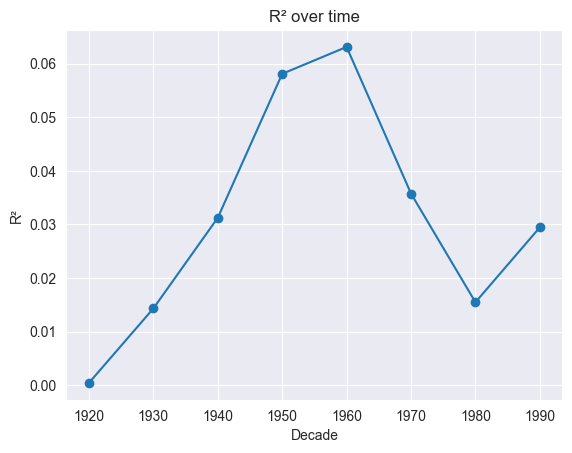

In [121]:
import matplotlib.pyplot as plt

plt.plot(df_reg['decade'], df_reg['r2'], marker='o')
plt.xlabel("Decade")
plt.ylabel("R²")
plt.title("R² over time")
plt.grid(True)
plt.show()


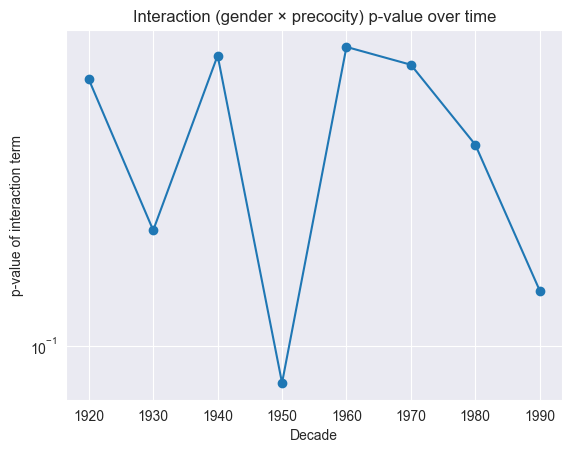

In [122]:
plt.plot(df_reg['decade'], df_reg['pval'], marker='o')
plt.yscale('log')   # p-values are easier to read on log scale
plt.xlabel("Decade")
plt.ylabel("p-value of interaction term")
plt.title("Interaction (gender × precocity) p-value over time")
plt.grid(True)
plt.show()


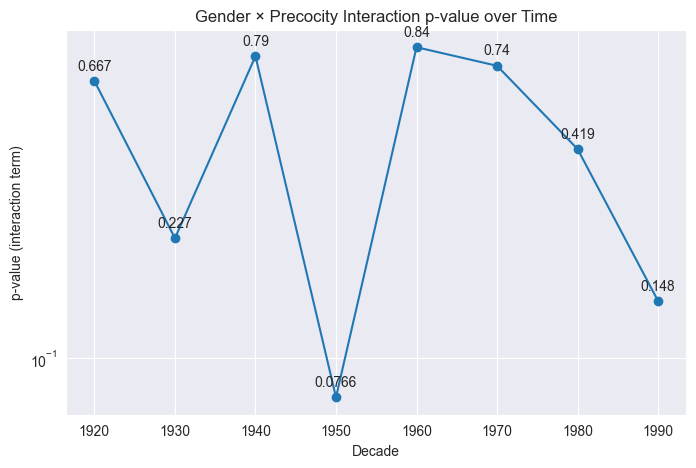

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(df_reg['decade'], df_reg['pval'], marker='o')
plt.yscale('log')
plt.xlabel("Decade")
plt.ylabel("p-value (interaction term)")
plt.title("Gender × Precocity Interaction p-value over Time")
plt.grid(True)

# Annotation for each point
for decade, pval in zip(df_reg['decade'], df_reg['pval']):
    plt.annotate(f"{pval:.3g}",        # formats like 0.00234 → '0.00234'
                 (decade, pval),
                 textcoords="offset points",
                 xytext=(0, 8),       # slight vertical offset
                 ha='center')

plt.show()
